In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn. preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Dataset info

In [2]:
# Breast Cancer Diagnosis Project using Major Classification Algorithms
# پروژه تشخیص سرطان سینه با استفاده از الگوریتم های مهم کلاسیفیکیشن

bc = load_breast_cancer()
# Dataset info | اطلاعات دیتاست
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [3]:
# Show the label of the 501st sample
# لیبل ها
# میخوایم ببینیم نفر 501ام بیمار بوده یا نه
# تارگت اینجا به معنی همون لیبل هست
bc.target[500]

np.int64(1)

In [4]:
# Show the features of the 501st sample
# ویژگی ها یا همون فیچر ها
# میخوایم فیچر های نفر 501ام رو ببینیم
# دیتا اینجا به معنی همون فیچر هست
bc.data[500]

array([1.504e+01, 1.674e+01, 9.873e+01, 6.894e+02, 9.883e-02, 1.364e-01,
       7.721e-02, 6.142e-02, 1.668e-01, 6.869e-02, 3.720e-01, 8.423e-01,
       2.304e+00, 3.484e+01, 4.123e-03, 1.819e-02, 1.996e-02, 1.004e-02,
       1.055e-02, 3.237e-03, 1.676e+01, 2.043e+01, 1.097e+02, 8.569e+02,
       1.135e-01, 2.176e-01, 1.856e-01, 1.018e-01, 2.177e-01, 8.549e-02])

In [5]:
# Show the shape of target and data arrays
# نمایش تعداد نمونه‌ها و ویژگی‌ها
bc.target.shape, bc.data.shape

((569,), (569, 30))

# Pre-processing

In [6]:
# Split the data into train and test sets
# تقسیم داده ها به بخش های تست و ترِین

X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)

# Show the number of samples in train and test sets
# میخوایم ببینیم چند تا از داده ها به عنوان تست و چند تاشون به عنوان ترِین در نظر گرفته شدن
print(f"Feature => train: {X_train.shape} - test: {X_test.shape}")
print(f"Label => train: {y_train.shape} - test: {y_test.shape}")

Feature => train: (455, 30) - test: (114, 30)
Label => train: (455,) - test: (114,)


In [7]:
# Normalize the features to range [0, 1]
# نرمال سازی ویژگی‌ها بین 0 و 1

scalar = MinMaxScaler(feature_range=(0, 1))
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test) # فقط ترنسفرم روی تست چون مدل نباید داده های تست رو یاد بگیره

# Performance metric

In [8]:
# Define a function to calculate evaluation metrics
# یک تابع برای محاسبه معیار های ارزیابی مینویسیم تا دیگه مجبور نباشیم هر سری اینکارو کنیم

def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    p = precision_score(y_true=y_test, y_pred=y_pred_test)
    r = recall_score(y_true=y_test, y_pred=y_pred_test)
    print(f"acc train : {acc_train} - acc test : {acc_test} - precision : {p} - recall : {r}")
    return acc_train, acc_test, p, r

# Classification

1. Naive bayes

In [9]:
# Create and fit the Naive Bayes model, then evaluate
# ساخت و فیت کردن مدل

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_train = nb.predict(X_train)
y_pred_test = nb.predict(X_test)
acc_train_nb, acc_test_nb, p_nb, r_nb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)


acc train : 0.9406593406593406 - acc test : 0.9298245614035088 - precision : 0.9295774647887324 - recall : 0.9565217391304348


2. KNN

In [10]:
# Create and fit the KNN model, then evaluate

# n_neighbors: تعداد همسایه‌ها
# algorithm: روش جستجو
# leaf_size: تعداد نمونه‌های هر برگ
knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train : 0.9758241758241758 - acc test : 0.9649122807017544 - precision : 0.9577464788732394 - recall : 0.9855072463768116


3. Decision Tree

In [11]:
# Create and fit the Decision Tree model, then evaluate

# max_depth: حداکثر عمق درخت
# min_samples_split: حداقل نمونه برای تقسیم گره
# criterion: معیار تقسیم
dt = DecisionTreeClassifier(max_depth=64, min_samples_split=2, criterion='gini')
dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train : 1.0 - acc test : 0.9473684210526315 - precision : 0.9565217391304348 - recall : 0.9565217391304348


4. Random Forest

In [12]:
# Create and fit the Random Forest model, then evaluate

# n_estimators: تعداد درخت‌ها
# max_depth: حداکثر عمق هر درخت
# min_samples_split: حداقل نمونه برای تقسیم گره
rf = RandomForestClassifier(n_estimators=1000, max_depth=32, min_samples_split=4)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)


acc train : 0.9978021978021978 - acc test : 0.956140350877193 - precision : 0.9444444444444444 - recall : 0.9855072463768116


5. SVM

In [13]:
# Create and fit the SVM model, then evaluate

# kernel: نوع کرنل برای تبدیل داده‌ها به فضای بُعد بالاتر
svm = SVC(kernel='poly')
svm.fit(X_train, y_train)
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)
acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)


acc train : 0.9868131868131869 - acc test : 0.9912280701754386 - precision : 0.9857142857142858 - recall : 1.0


6. Logistic Regression

In [14]:
# Create and fit the Logistic Regression model, then evaluate

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train : 0.967032967032967 - acc test : 0.9649122807017544 - precision : 0.9452054794520548 - recall : 1.0


7. ANN

In [15]:
# Create and fit the Artificial Neural Network model, then evaluate

# hidden_layer_sizes: تعداد نورون‌های لایه مخفی
# activation: تابع فعال‌سازی
# solver: روش به‌روزرسانی وزن‌ها
# batch_size: اندازه هر دسته آموزش
ann = MLPClassifier(hidden_layer_sizes=256, activation='relu', solver='adam', batch_size=64)
ann.fit(X_train, y_train)
y_pred_train = ann.predict(X_train)
y_pred_test = ann.predict(X_test)
acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train : 0.989010989010989 - acc test : 0.9912280701754386 - precision : 0.9857142857142858 - recall : 1.0


c:\Users\Abolfazl\Desktop\Cumputer\programing\machine_learning\AI-Learning-Journey\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Comparison

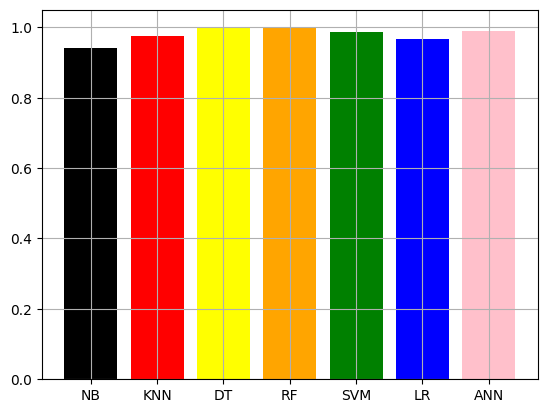

In [16]:
# Compare training accuracy of all models
# مقایسه دقت آموزش مدل‌ها

title = ["NB", 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
acc_train = [acc_train_nb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]
colors = ['black', 'red', 'yellow', 'orange', 'green', 'blue', 'pink']
plt.bar(title, acc_train, color=colors)
plt.grid()
plt.show()

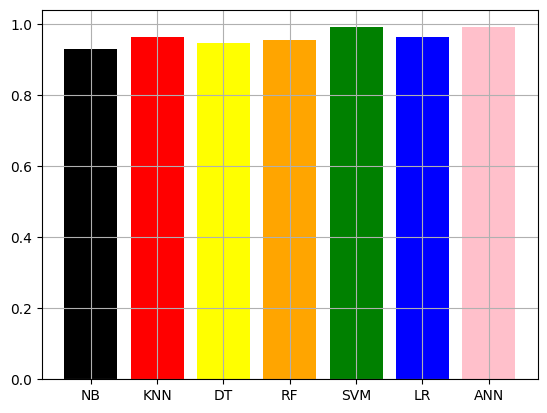

In [17]:
# Compare test accuracy of all models
# مقایسه دقت تست مدل‌ها

acc_test = [acc_test_nb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]
plt.bar(title, acc_test, color=colors)
plt.grid()
plt.show()

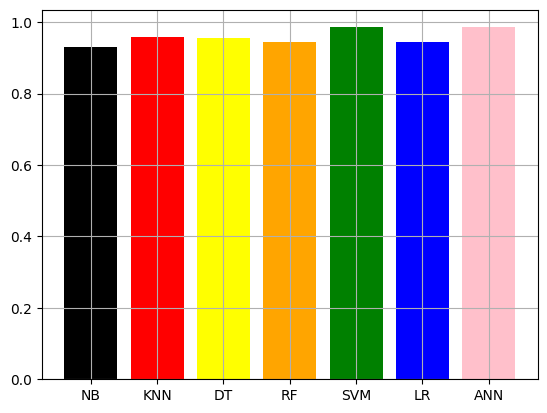

In [18]:
# Compare test precision of all models
# مقایسه پریسیژن مدل‌ها

p = [p_nb, p_knn, p_dt, p_rf, p_svm, p_lr, p_ann]
plt.bar(title, p, color=colors)
plt.grid()
plt.show()

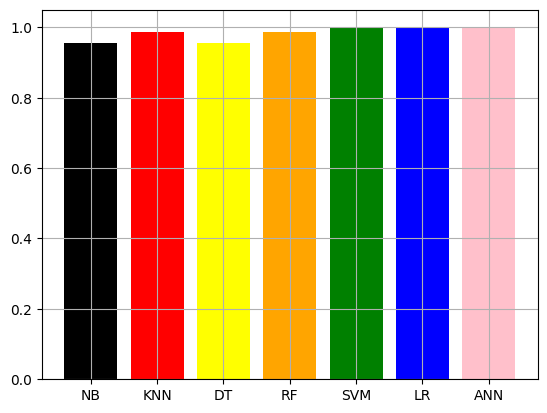

In [19]:
# Compare test recall of all models
# مقایسه ریکال مدل‌ها

r = [r_nb, r_knn, r_dt, r_rf, r_svm, r_lr, r_ann]
plt.bar(title, r, color=colors)
plt.grid()
plt.show()